# Flight Delay Prediction
## Random Under Sampling to Handle Imbalance in ArrDel15
- <strong>Environment Setup:</strong> import libraries and load the dataset
- <strong>Imbalanced Data Analysis:</strong> understanding how the dataset balance is restored using random under sampling
- <strong>Random Undersampling:</strong> or down-sampling the majority class is where the observations of the majority class are randomly removed to reduce its influence on the machine learning algorithm
- <strong>Inference:</strong> understand how the model produces results and choosing the best classifier

## Environment Setup

In [1]:
# Pre-requisites
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Store the classifier models to save time
import joblib

# Preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Classifiers from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

# Performance metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Imbalanced dataset helpers
from imblearn.under_sampling import RandomUnderSampler

df = pd.read_csv("Data/flight_and_weather_encoded.csv", index_col=0)

/home/admin/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


## Imbalanced Data Analysis

### Dataset Without Handling Imbalance

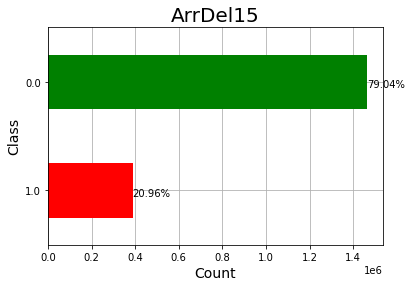

0.0    1463378
1.0     388058
Name: ArrDel15, dtype: int64


In [2]:
# Plotting the percentage of observations that fall under each class
ax = df["ArrDel15"].value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(df["ArrDel15"].value_counts())
fig = ax.get_figure()
fig.savefig("Img/07_01_Dataset_ArrDel15_Class_Imbalance.png")

In [3]:
features = df.loc[:, df.columns != "ArrDel15"]
labels = np.asarray(df["ArrDel15"])
# Number of samples/observations/rows is greater than 100,000
print(f"\nDataset shape: {df.shape}")
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.20, random_state=42)
print(f"features_train shape: {features_train.shape} | features_test shape: {features_test.shape}")
print(f"labels_train shape: {labels_train.shape} | labels_test shape: {labels_test.shape}")
# print(f"{features_train.shape[1]} Features: {features_train.columns.to_list()}")
del features
del labels


Dataset shape: (1851436, 24)
features_train shape: (1481148, 23) | features_test shape: (370288, 23)
labels_train shape: (1481148,) | labels_test shape: (370288,)


### Training Data Without Handling Imbalance

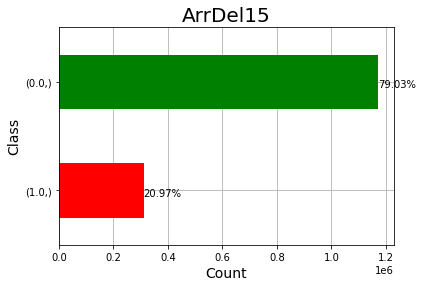

0.0    1170484
1.0     310664
dtype: int64


In [4]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/07_02_Training_ArrDel15_Class_Imbalance.png")

## Random Undersampling

In [5]:
rus = RandomUnderSampler(random_state=42)
features_train, labels_train = rus.fit_resample(features_train, labels_train)

### Balancing the Training Data

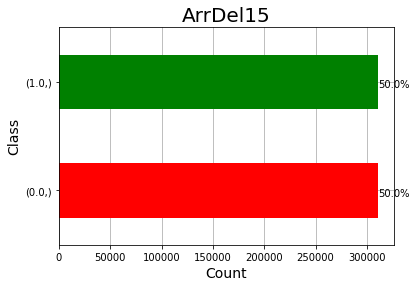

0.0    310664
1.0    310664
dtype: int64


In [6]:
# Plotting the percentage of observations that fall under each class
ax = pd.DataFrame(labels_train).value_counts().sort_values().plot(kind="barh", color=["r", "g"])
ax.set_axisbelow(True)
ax.grid()
totals= []
for i in ax.patches:
    totals.append(i.get_width())
total = sum(totals)
for i in ax.patches:
     ax.text(i.get_width()+.3, i.get_y()+.20, 
     str(round((i.get_width()/total)*100, 2))+'%', 
     fontsize=10, color='black')
plt.title("ArrDel15", fontsize=20)
plt.xlabel("Count", fontsize=14)
plt.ylabel("Class", fontsize=14)
plt.show()
print(pd.DataFrame(labels_train).value_counts())
fig = ax.get_figure()
fig.savefig("Img/07_03_RandomUnderSampling_Training_ArrDel15_Class.png")

### Logistic Regression

              precision    recall  f1-score   support

         0.0       0.94      0.93      0.93    292894
         1.0       0.74      0.78      0.76     77394

    accuracy                           0.90    370288
   macro avg       0.84      0.85      0.85    370288
weighted avg       0.90      0.90      0.90    370288



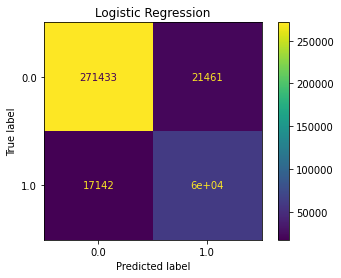

In [7]:
# model = LogisticRegression(n_jobs=-1)
# model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomUnderSampling/LogisticRegression.joblib")
model = joblib.load("./RandomUnderSampling/LogisticRegression.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Logistic Regression")
print(conf_mat_plot)
plt.savefig("Img/07_04_RandomUnderSampling_LR_Confusion_Matrix")
del model
del model_pred

### Decision Tree Classifier

              precision    recall  f1-score   support

         0.0       0.94      0.79      0.86    292894
         1.0       0.50      0.81      0.62     77394

    accuracy                           0.79    370288
   macro avg       0.72      0.80      0.74    370288
weighted avg       0.85      0.79      0.81    370288



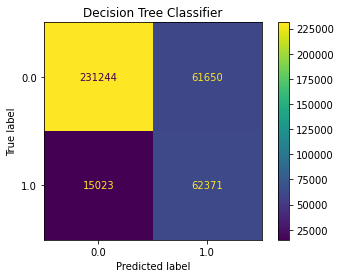

In [8]:
# model = DecisionTreeClassifier()
# model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomUnderSampling/DecisionTreeClassifier.joblib")
model = joblib.load("./RandomUnderSampling/DecisionTreeClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Decision Tree Classifier")
print(conf_mat_plot)
plt.savefig("Img/07_05_RandomUnderSampling_DTC_Confusion_Matrix")
del model
del model_pred

### Gradient Boosting Classifier

              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93    292894
         1.0       0.73      0.79      0.76     77394

    accuracy                           0.90    370288
   macro avg       0.84      0.86      0.85    370288
weighted avg       0.90      0.90      0.90    370288



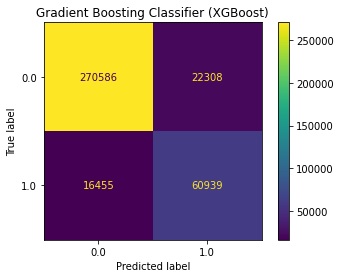

In [9]:
# model = GradientBoostingClassifier()
# model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomUnderSampling/GradientBoostingClassifier.joblib")
model = joblib.load("./RandomUnderSampling/GradientBoostingClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Gradient Boosting Classifier (XGBoost)")
print(conf_mat_plot)
plt.savefig("Img/07_06_RandomUnderSampling_GBC_Confusion_Matrix")
del model
del model_pred

### Random Forest

              precision    recall  f1-score   support

         0.0       0.95      0.91      0.93    292894
         1.0       0.70      0.81      0.75     77394

    accuracy                           0.89    370288
   macro avg       0.83      0.86      0.84    370288
weighted avg       0.90      0.89      0.89    370288



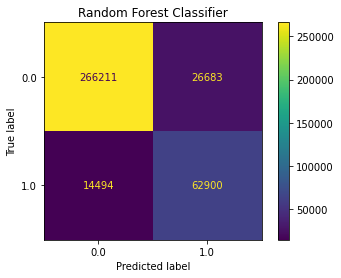

In [10]:
# model = RandomForestClassifier(n_jobs=-1)
# model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomUnderSampling/RandomForestClassifier.joblib")
model = joblib.load("./RandomUnderSampling/RandomForestClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Random Forest Classifier")
print(conf_mat_plot)
plt.savefig("Img/07_07_RandomUnderSampling_RFC_Confusion_Matrix")
del model
del model_pred

### Extra Trees Classifier

              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92    292894
         1.0       0.67      0.82      0.74     77394

    accuracy                           0.88    370288
   macro avg       0.81      0.86      0.83    370288
weighted avg       0.89      0.88      0.88    370288



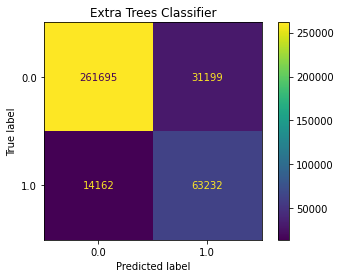

In [11]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(features_train, labels_train)
# joblib.dump(model, "./RandomUnderSampling/ExtraTreesClassifier.joblib")
# model = joblib.load("./RandomUnderSampling/ExtraTreesClassifier.joblib")
model_pred = model.predict(features_test)
# print(confusion_matrix(labels_test, model_pred))
print(classification_report(labels_test, model_pred))
conf_mat_plot = plot_confusion_matrix(model, features_test, labels_test)
plt.title("Extra Trees Classifier")
print(conf_mat_plot)
plt.savefig("Img/07_08_RandomUnderSampling_ETC_Confusion_Matrix")

## Inference
<table>
    <thead>
        <tr>
            <th rowspan="3">Classification Model</th>
            <th colspan="8">Performance Metric</th>
        </tr>
        <tr>
            <th colspan="2">Precision</th>
            <th colspan="2">Recall</th>
            <th colspan="2">F1 Score</th>
            <th rowspan="2" colspan="2">Accuracy</th>
        </tr>
        <tr>
            <th>0.0</th>
            <th>1.0</th>
            <th>0.0</th>
            <th>1.0</th>
            <th>0.0</th>
            <th>1.0</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <th>Logistic Regression</th>
            <td>0.94</td>
            <td>0.74</td>
            <td>0.93</td>
            <td>0.78</td>
            <td>0.93</td>
            <td>0.76</td>
            <td>0.90</td>
        </tr>
        <tr>
            <th>Decision Tree Classifier</th>
            <td>0.94</td>
            <td>0.50</td>
            <td>0.79</td>
            <td>0.81</td>
            <td>0.86</td>
            <td>0.62</td>
            <td>0.79</td>
        </tr>
        <tr>
            <th>Extra Trees Classifier</th>
            <td>0.95</td>
            <td>0.67</td>
            <td>0.89</td>
            <td>0.82</td>
            <td>0.92</td>
            <td>0.74</td>
            <td>0.88</td>
        </tr>
        <tr>
            <th>Gradient Boosting Classifier</th>
            <td>0.94</td>
            <td>0.73</td>
            <td>0.92</td>
            <td>0.79</td>
            <td>0.93</td>
            <td>0.76</td>
            <td>0.90</td>
        </tr>
        <tr>
            <th>Random Forest Classifier</th>
            <td>0.95</td>
            <td>0.70</td>
            <td>0.91</td>
            <td>0.81</td>
            <td>0.93</td>
            <td>0.75</td>
            <td>0.89</td>
        </tr>
    </tbody>
</table>